### Testing Start

In [1]:
%pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,  # 对图像的每个像素值均乘以该数值后再做偏移，实现归一化
    rotation_range= 20,  # 随机旋转的度数范围
    width_shift_range=0.1,  # 图片宽度上随机移动的范围，这里的0.2指最多移动图片宽度的20%
    height_shift_range=0.1,  # 图片高度上随机移动的范围，这里的0.2指最多移动图片高度的20%
    shear_range=0.15,  # 剪切强度（逆时针方向的剪切变换角度）
    zoom_range=0.15,  # 随机缩放的幅度
    horizontal_flip=True,  # 随机将图片水平翻转
    fill_mode='nearest',  # 当进行变换时，新出现的像素点如何填充
    validation_split=0.2)  # 从训练数据中划分出20%的数据作为验证数据


In [4]:
train_generator = train_datagen.flow_from_directory(
    'images',  # 训练数据文件夹路径
    target_size=(100, 100),  # 将所有图片大小调整为100x100
    batch_size=32,  # 每批数据的大小
    class_mode='categorical',  # 由于我们进行多类别分类，使用"分类"模式
    subset='training')  # 指定这是用于训练的数据

validation_generator = train_datagen.flow_from_directory(
    'images',  # 训练数据文件夹路径，同样用于验证数据的提取
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='validation')  # 指定这是用于验证的数据


Found 288 images belonging to 9 classes.
Found 71 images belonging to 9 classes.


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),

    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),

    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),

    Dense(9, activation='softmax')  # 9是类别数量
])


c:\Users\lycym\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
optimizer = Adam(learning_rate=0.0005)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         4,617 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,651,977 (25.38 MB)

 Trainable params: 6,651,977 (25.38 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Calculate the appropriate steps per epoch
train_image_count = len(train_generator.filenames)
validation_image_count = len(validation_generator.filenames)

train_image_count, validation_image_count

# steps_per_epoch = train_image_count // train_generator.batch_size
# validation_steps = validation_image_count // validation_generator.batch_size


(288, 71)

In [10]:
from PIL import Image

history = model.fit(
    train_generator,
    steps_per_epoch=12,  # 这取决于你的数据量和batch_size
    epochs=15,
    validation_data=validation_generator,
    validation_steps=8  
)


Epoch 1/15


c:\Users\lycym\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 9/12 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - accuracy: 0.1159 - loss: 2.3120

c:\Users\lycym\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 508ms/step - accuracy: 0.1225 - loss: 2.2968 - val_accuracy: 0.3944 - val_loss: 2.0645
Epoch 2/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 365ms/step - accuracy: 0.2425 - loss: 2.0123 - val_accuracy: 0.3803 - val_loss: 1.6722
Epoch 3/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 389ms/step - accuracy: 0.3662 - loss: 1.6566 - val_accuracy: 0.4366 - val_loss: 1.4160
Epoch 4/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 384ms/step - accuracy: 0.4973 - loss: 1.4221 - val_accuracy: 0.5070 - val_loss: 1.3609
Epoch 5/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 425ms/step - accuracy: 0.5311 - loss: 1.3205 - val_accuracy: 0.5352 - val_loss: 1.2689
Epoch 6/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 416ms/step - accuracy: 0.5194 - loss: 1.2383 - val_accuracy: 0.5634 - val_loss: 1.2034
Epoch 7/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 390ms/step - accuracy: 0.5663 - loss: 1.1895 - val_accuracy: 0.6197 - val_loss: 1.2168
Epoch 8/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 370ms/step - accuracy: 0.5929 - loss: 1.1497 - val_accuracy: 0.619

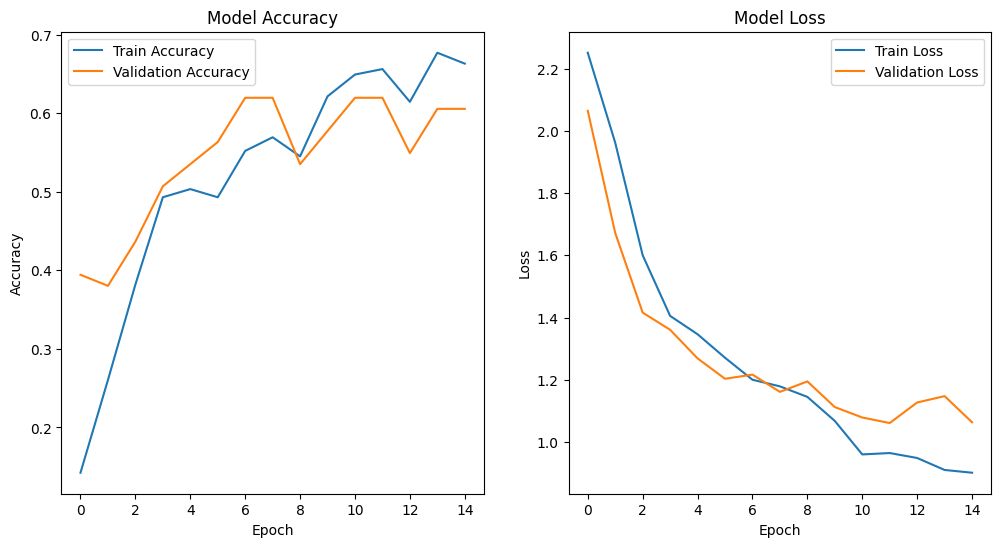

In [11]:
import matplotlib.pyplot as plt

# 绘制训练和验证的准确率值
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# 绘制训练和验证的损失值
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()


In [12]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def prepare_image(image_path):
    img = load_img(image_path, target_size=(100, 100))  # 加载图片并调整大小
    img_array = img_to_array(img)  # 将图片转换为numpy数组
    img_array = img_array / 255.0  # 归一化
    img_array = np.expand_dims(img_array, axis=0)  # 增加批次维度
    return img_array

# 替换为你的图片路径
image_path = 'image.png'
prepared_img = prepare_image(image_path)


In [13]:
predictions = model.predict(prepared_img)
predicted_class = np.argmax(predictions[0])  # 获取概率最高的类别索引
class_labels = {v: k for k, v in train_generator.class_indices.items()}  # 反转类别索引和类别名称的字典
predicted_class_name = class_labels[predicted_class]  # 获取类别名称
print("Predicted class:", predicted_class_name)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
Predicted class: cherry fruit


### Testing End